In [1]:
%pip install matplotlib
%pip install scipy
%pip install community
%pip install python-louvain


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import community.community_louvain
import numpy as np
import matplotlib.cm as cm


In [3]:
G = nx.read_edgelist("as.txt", delimiter="	")

In [4]:
print("Nodes length: "+str(len(G.nodes)))
print("Edges length: "+str(len(G.edges)))

Nodes length: 6474
Edges length: 13895


In [5]:
pos_spring_layout = nx.spring_layout(G)

In [6]:
from matplotlib.pyplot import figure

def print_graph(G, pos): 
    figure(figsize=(12, 12), dpi=90)
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=8)
    # edges
    nx.draw_networkx_edges(G, pos, width=0.5,alpha=0.2)
    plt.axis('off')
    plt.figure(figsize=(50000,50000))
    plt.show()

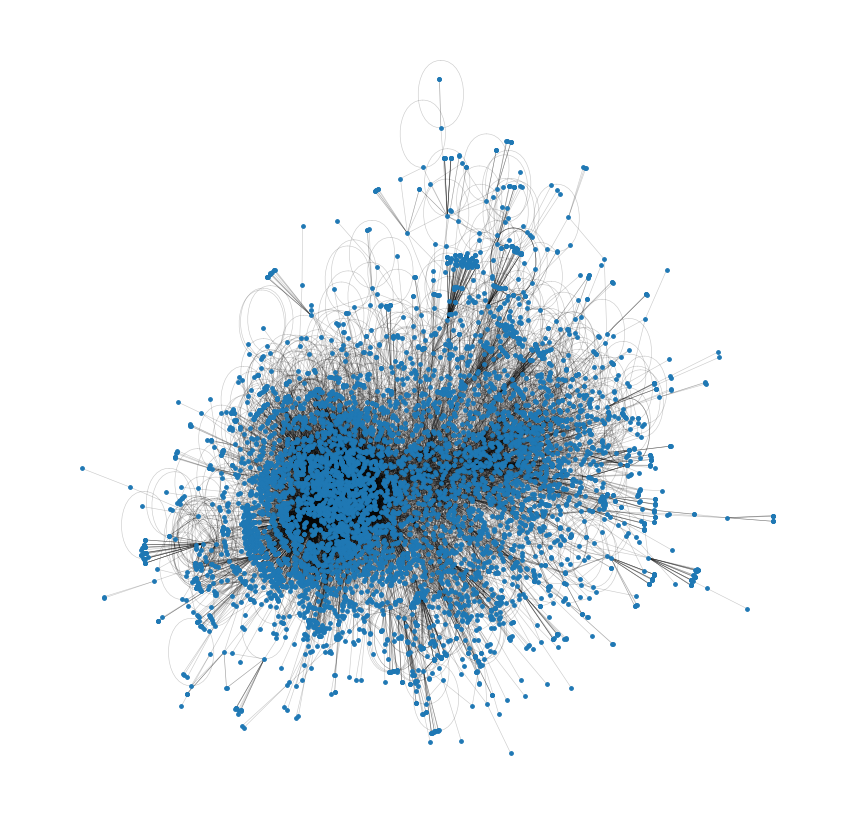

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

In [7]:
print_graph(G, pos_spring_layout)

In [8]:
G_without_loops = nx.Graph(G)
G_without_loops.remove_edges_from(nx.selfloop_edges(G_without_loops))


k_cores Nodes length: 107
k_cores Edges length: 868


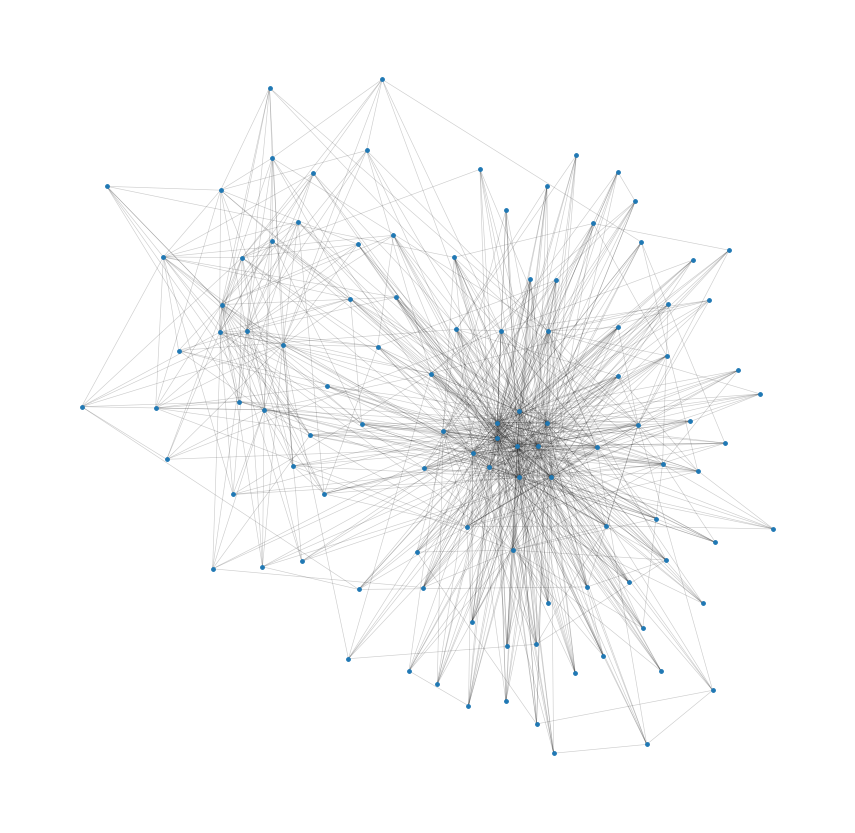

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

In [9]:
k_cores = nx.k_core(G_without_loops, 7)

print("k_cores Nodes length: "+str(len(k_cores.nodes)))
print("k_cores Edges length: "+str(len(k_cores.edges)))

pos = nx.spring_layout(k_cores)
print_graph(k_cores, pos)

In [10]:
###COMUNIDADES###

partition = community.community_louvain.best_partition(G)

In [11]:
nodesXcommunity = {}
for k,v in partition.items():
    if v in nodesXcommunity:
        nodesXcommunity[v] += 1
    else:
        nodesXcommunity[v] = 1
print(nodesXcommunity)

{0: 368, 1: 1607, 2: 483, 3: 310, 4: 864, 5: 156, 6: 120, 7: 158, 8: 54, 9: 110, 10: 138, 11: 143, 12: 226, 13: 76, 14: 151, 15: 97, 16: 44, 17: 201, 18: 93, 19: 185, 20: 113, 21: 52, 22: 135, 23: 121, 24: 38, 25: 48, 27: 226, 28: 4, 29: 13, 30: 5, 31: 26, 33: 76, 32: 28, 26: 5}


In [12]:
def print_communities_graph(G, pos, partition):
    figure(figsize=(12, 12), dpi=90)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=8,
                        cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    #nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
    plt.show()


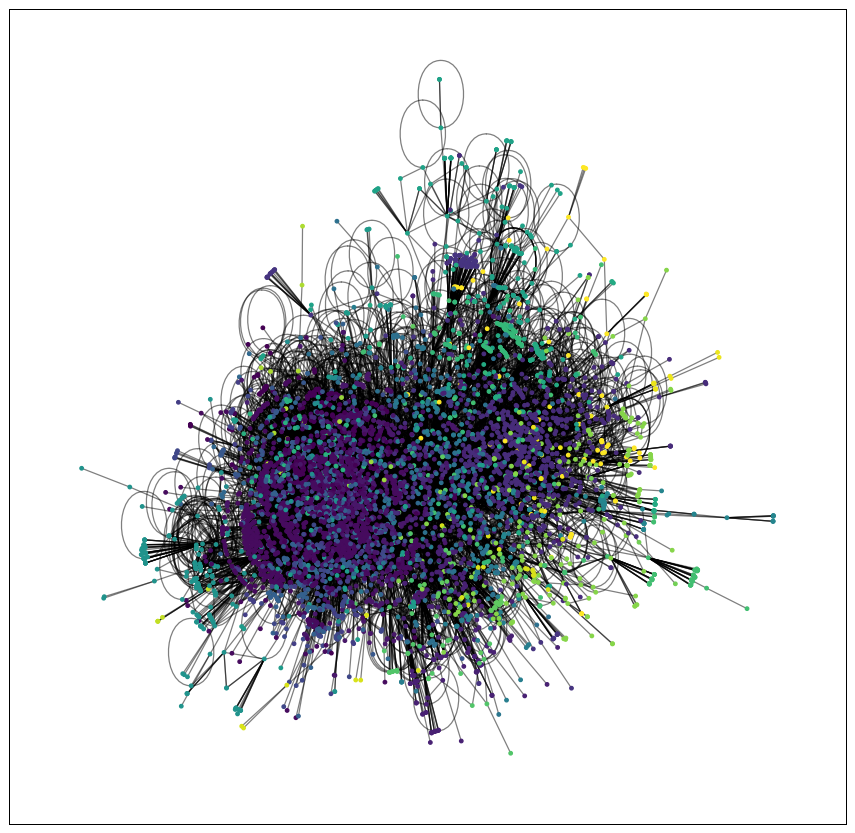

In [13]:
print_communities_graph(G, pos_spring_layout, partition)

In [14]:
###SUBCOMUNIDADES###

COMUNIDAD = 1 #Elegimos la que tiene mas nodos
G_subcomunnity = nx.Graph()

subcommunity_nodes = []
for k,v in partition.items():
    if v == COMUNIDAD:
        subcommunity_nodes.append(k)
G_subcomunnity.add_nodes_from(subcommunity_nodes)

subcommunity_edges = []
for e in G.edges():
    if partition[e[0]] == COMUNIDAD and partition[e[1]] == COMUNIDAD:
        subcommunity_edges.append(e) 
G_subcomunnity.add_edges_from(subcommunity_edges)

partition_subcommunity = community.community_louvain.best_partition(G_subcomunnity)

In [15]:
nodesXsubcommunity = {}
for k,v in partition_subcommunity.items():
    if v in nodesXsubcommunity:
        nodesXsubcommunity[v] += 1
    else:
        nodesXsubcommunity[v] = 1
print(nodesXsubcommunity)

{2: 322, 1: 232, 17: 203, 3: 237, 4: 41, 5: 145, 6: 130, 7: 10, 12: 40, 9: 54, 10: 4, 11: 10, 13: 9, 14: 115, 15: 11, 0: 29, 18: 6, 8: 2, 16: 5, 19: 2}


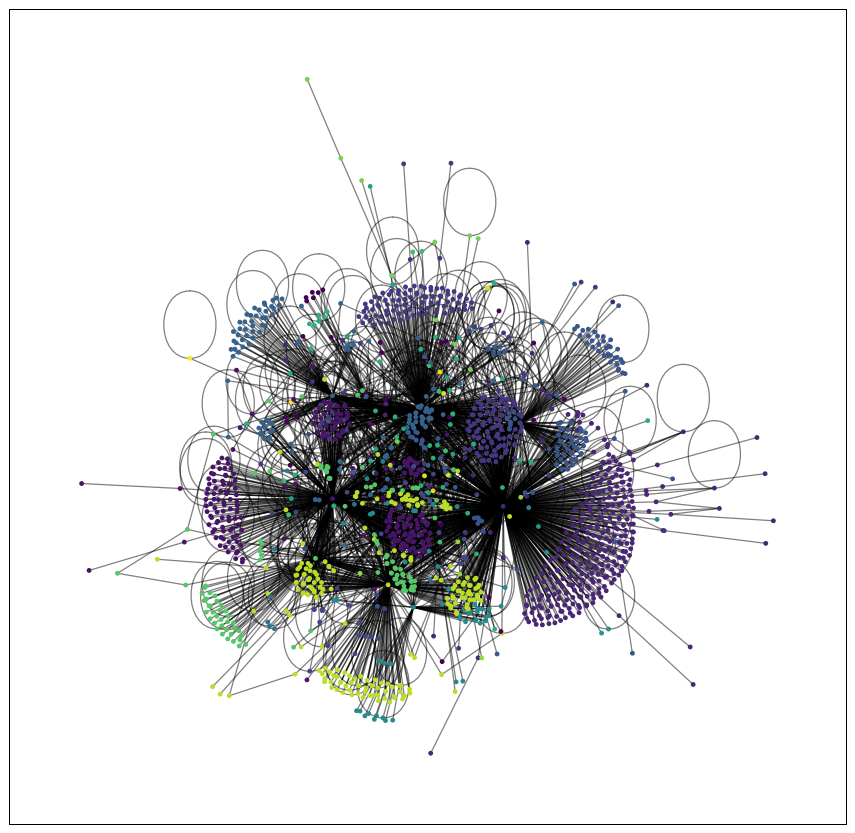

In [16]:
pos_spring_layout_subcommunities = nx.spring_layout(G_subcomunnity)
print_communities_graph(G_subcomunnity, pos_spring_layout_subcommunities, partition_subcommunity)

In [21]:
#Motifs

from motifs.calculos import calcular_motifs, significance_profile, motif_grafo_eleatorios
from metricas import distribucion_grados
from modelos import configuration_model
from motifs.graficos import graficar_significant_profile


In [17]:
###grafo para calcularle motifs###

COMUNIDAD = 4 #864 nodos
G_motifs = nx.Graph()

motifs_nodes = []
for k,v in partition.items():
    if v == COMUNIDAD:
        motifs_nodes.append(k)
G_motifs.add_nodes_from(motifs_nodes)

motifs_edges = []
for e in G.edges():
    if partition[e[0]] == COMUNIDAD and partition[e[1]] == COMUNIDAD:
        motifs_edges.append(e) 
G_motifs.add_edges_from(motifs_edges)

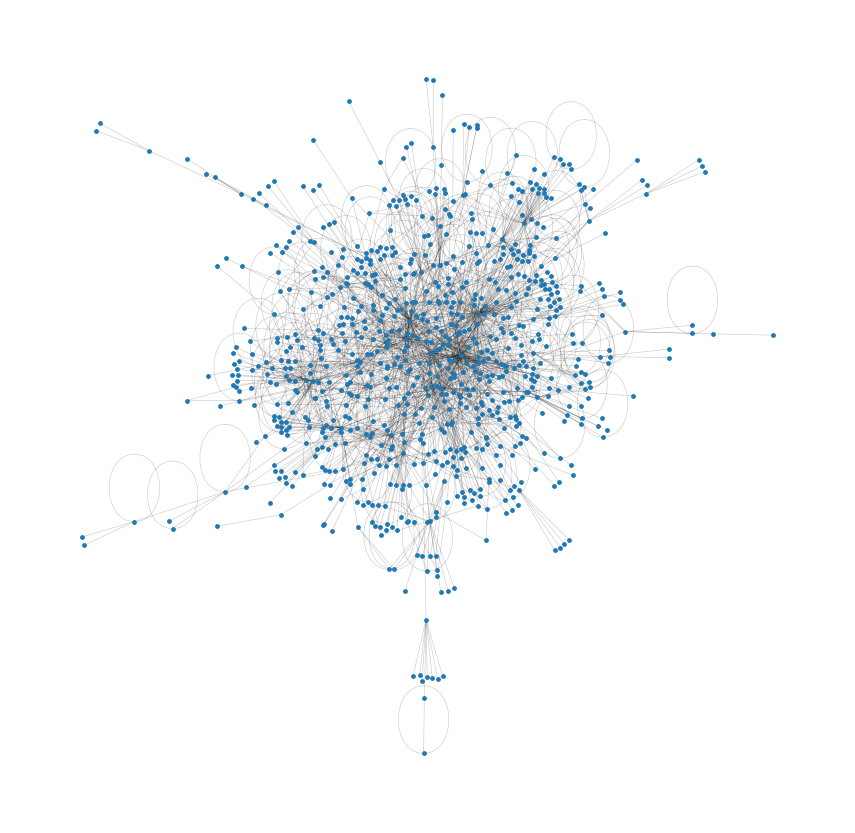

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

In [18]:
print_graph(G_motifs, nx.spring_layout(G_motifs))

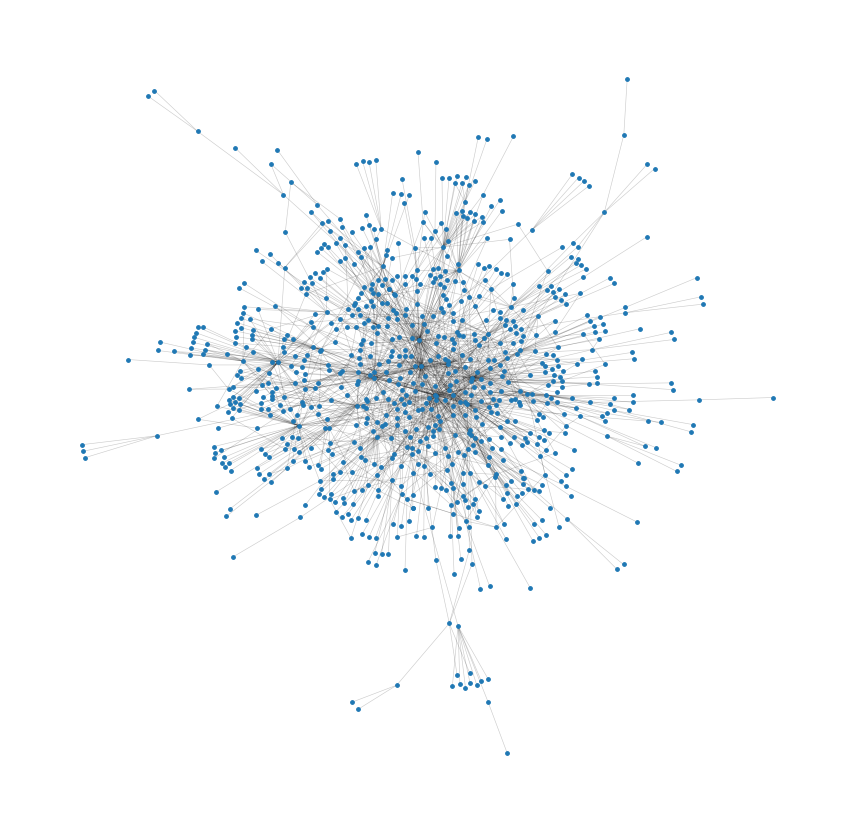

<Figure size 3.6e+06x3.6e+06 with 0 Axes>

In [19]:
#saco self loops
G_motifs.remove_edges_from(nx.selfloop_edges(G_motifs))
print_graph(G_motifs, nx.spring_layout(G_motifs))

In [22]:
MAX_NODOS_MOTIFS = 4
motifs = calcular_motifs(G_motifs, MAX_NODOS_MOTIFS)
print("PRINTEO LOS MOTIFS")
print(motifs)

PRINTEO LOS MOTIFS
[  52451     493  495023 1527506    7772   82167    4965     100]


In [24]:
dist = distribucion_grados(G_motifs)
promedios, stds = motif_grafo_eleatorios(lambda: configuration_model(dist), MAX_NODOS_MOTIFS, iters=10)


Iteracion 1
Iteracion 2; anterior: 442.15 segs
Iteracion 3; anterior: 476.62 segs
Iteracion 4; anterior: 383.23 segs
Iteracion 5; anterior: 467.22 segs
Iteracion 6; anterior: 470.56 segs
Iteracion 7; anterior: 508.97 segs
Iteracion 8; anterior: 437.30 segs
Iteracion 9; anterior: 477.33 segs
Iteracion 10; anterior: 471.65 segs


In [25]:
print("Promedios: " + str(promedios))
print("stds: " + str(stds))

Promedios: [4.169390e+04 4.600000e+02 4.485465e+05 9.322777e+05 7.058800e+03
 7.584080e+04 4.047800e+03 1.708000e+02]
stds: [1.51407605e+03 3.02225082e+01 1.95143463e+04 7.05657959e+04
 9.74311737e+02 5.91384690e+03 3.92483834e+02 3.49479613e+01]


SP: [ 0.60102281  0.09236614  0.2014759   0.71356419  0.06192367  0.09049331
  0.19769009 -0.17137312]


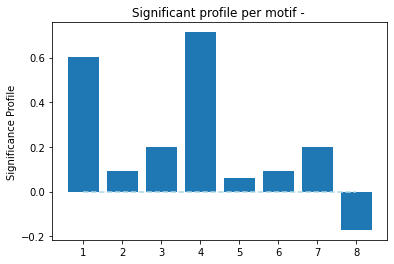

In [26]:
SP = significance_profile(motifs, promedios, stds)
print("SP:", SP)
graficar_significant_profile(SP, '')